In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats

# Data Description

In [120]:
data=pd.read_csv('MtGoxFull.csv')
data['timestamp']=pd.to_datetime(data['timestamp'],unit='s')
data.set_index('timestamp',inplace=True)

### Basic describe of the data:

- Number of transaction, 
- Average size of transaction, 
- Quantile.

In [121]:
data.value.describe()

count    465776.000000
mean          3.822747
std          97.805456
min           0.000000
25%           0.010262
50%           0.040000
75%           0.247144
max       17964.778282
Name: value, dtype: float64

### Evolution of the size of transaction during the period

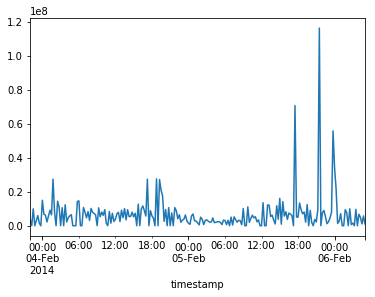

In [122]:
tota=data.resample(time_interval).sum()
tota.valueDoll.plot()

From 6pm to 0am 05 Feb there were 3 spikes in the size of transaction which were abnormally higher than normal.

### Evolution of the number of transaction during the period

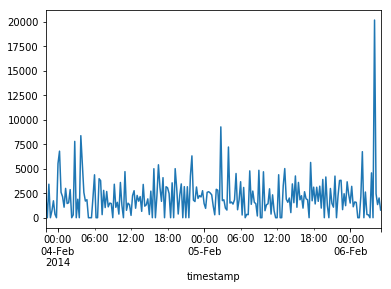

In [123]:
tota=data.resample(time_interval).count()
tota.valueDoll.plot()

From 6pm to 0am 05 Feb there were no spike in the number of transaction, which means there were a few transactions with really big volume happened instead of severval small transactions. May imply the moving of BTC of big players.

Around 5am 06 Feb, there were abnormally high number of transaction but the size of transaction were not higher than normal. May indicates the movement of BTC of small investors. Maybe the slow reaction of the small investors to the news.

### Convert into edge list

In [124]:
edge=nx.from_pandas_edgelist(data,source='source',
                                   target='target',edge_attr=True,
                                   create_using=nx.DiGraph())

Show number of nodes and edges, conlude that there are too many nodes and edges, have to filter the data.

In [125]:
edge.number_of_nodes()

163108

In [126]:
edge.number_of_edges()

297242

Checking the percentile of transaction with the size higher than 15

In [127]:
stats.percentileofscore(data['value'],15)

97.59133145546357

### Filter data with transaction size greater than 15

In [128]:
data2=data[data.value>15]

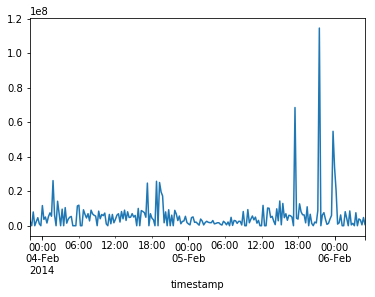

In [129]:
tota=data2.resample(time_interval).sum()
tota.valueDoll.plot()

The transaction size when filtered out transaction lower than 15 stays almost the same

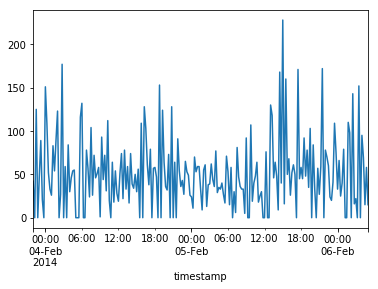

In [130]:
tota=data2.resample(time_interval).count()
tota.valueDoll.plot()

Regarding the number of transaction, there is no spike in 06 Feb like when it is not filtered. Further support for the assumption of most of the spike from transaction were from small investors.

In [133]:
edge2=nx.from_pandas_edgelist(data2,source='source',
                                   target='target',edge_attr=True,
                                   create_using=nx.DiGraph())

In [134]:
edge2.number_of_nodes()

10093

In [135]:
edge2.number_of_edges()

9938

After filtering the number of edges and nodes were significantly reduced.